In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import acquire


In [2]:
iris = sns.load_dataset('iris')

# data split
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [3]:
X = train_scaled[['petal_length','sepal_length']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
kmeans.cluster_centers_

array([[ 0.76721355,  0.73652301],
       [-1.21846042, -0.95337341],
       [ 1.47947637,  1.95407918],
       [ 0.29228228, -0.2690827 ]])

In [5]:
pd.DataFrame(kmeans.cluster_centers_,columns=X.columns)

,petal_length,sepal_length
0,0.767214,0.736523
1,-1.218460,-0.953373
2,1.479476,1.954079
3,0.292282,-0.269083


In [6]:
X.shape

(121, 2)

In [7]:
kmeans.labels_.shape

(121,)

In [8]:
train['cluster'] = kmeans.labels_
train

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sepal_length,sepal_width,petal_length,petal_width,species,cluster
41,4.5,2.3,1.3,0.3,setosa,1
142,5.8,2.7,5.1,1.9,virginica,3
82,5.8,2.7,3.9,1.2,versicolor,3
127,6.1,3.0,4.9,1.8,virginica,0
28,5.2,3.4,1.4,0.2,setosa,1
...,...,...,...,...,...,...
29,4.7,3.2,1.6,0.2,setosa,1
52,6.9,3.1,4.9,1.5,versicolor,0
1,4.9,3.0,1.4,0.2,setosa,1
57,4.9,2.4,3.3,1.0,versicolor,3


In [9]:
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,6.444737,2.950000,5.047368,1.731579
1,5.043182,3.427273,1.504545,0.275000
2,7.454545,3.136364,6.318182,2.027273
3,5.610714,2.685714,4.200000,1.392857


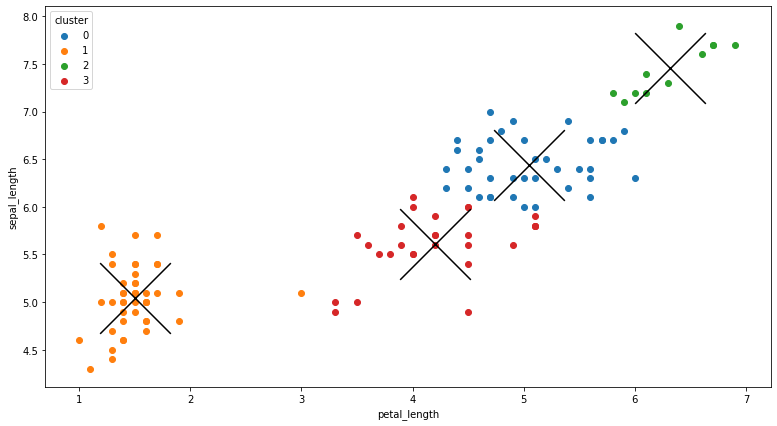

In [10]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_length, subset.sepal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal length', xlabel='petal length')

train.groupby('cluster').mean().plot.scatter(y='sepal_length', x='petal_length', marker='x', s=5000, ax=ax, c='black')

In [11]:
# sum of squared distances from each point to its cluster center
kmeans.inertia_

23.202523889504953

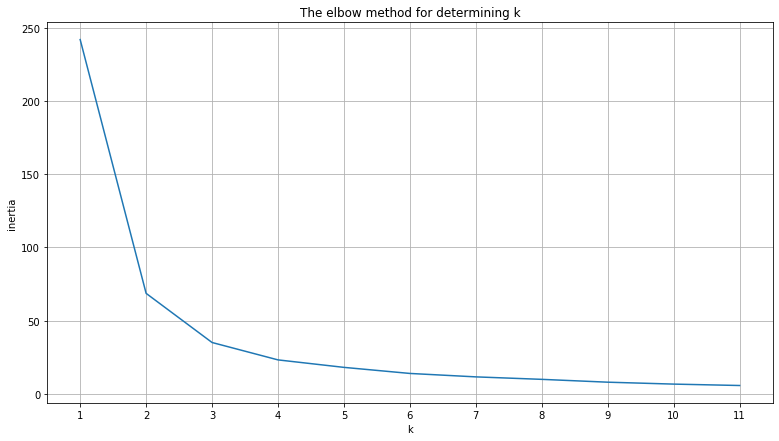

In [12]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

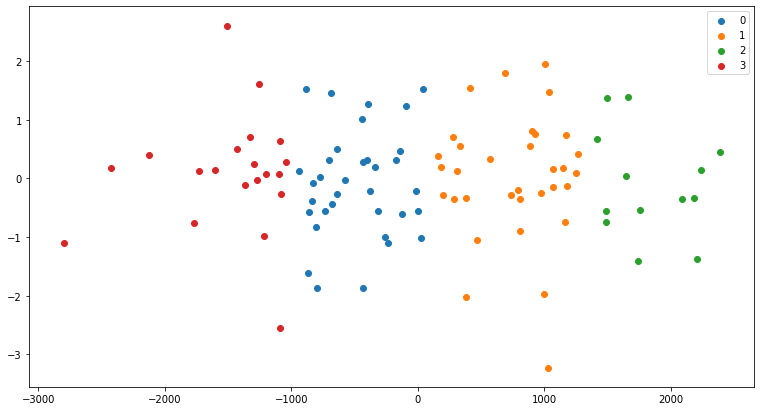

In [13]:
np.random.seed(123)

df = pd.DataFrame({
    'x': np.random.randn(100) * 1000,
    'y': np.random.randn(100),
})

kmeans = KMeans(n_clusters=4).fit(df)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(13, 7))
for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.x, subset.y, label=cluster)
plt.legend()

In [14]:
df = pd.read_csv('https://gist.githubusercontent.com/zgulde/ad9305acb30b00f768d4541a41f5ba19/raw/01f4ac8f158e68b0d293ff726c0c1dd08cdd501d/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [15]:
# data split
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = StandardScaler()
cols = ['age', 'bmi', 'charges']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [16]:
X = train_scaled[['age', 'bmi', 'children', 'smoker', 'charges']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
train['cluster'] = kmeans.labels_

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
pd.concat([
    train.groupby('cluster').mean(),
    train.groupby('cluster').size().rename('n_observations'),
], axis=1)

,age,sex,bmi,children,smoker,region,charges,n_observations
cluster,,,,,,,,
0,48.023810,0.547619,36.788810,0.476190,0.000000,1.452381,9169.871743,42
1,39.631579,0.447368,31.143092,2.644737,0.078947,1.500000,10878.666749,76
2,52.440000,0.460000,26.331600,0.420000,0.240000,1.340000,14918.686028,50
3,40.150000,0.725000,35.264625,1.100000,1.000000,1.625000,40941.054304,40
4,24.000000,0.506849,27.651918,0.410959,0.123288,1.561644,5244.147329,73


# Modeling Exercises

1. Clustering with the Iris Dataset

a. Choose features other than the ones used in the lesson.

In [18]:
#Bringing in the iris dataset
iris = sns.load_dataset('iris')

# splitting the data
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scaling the data
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
#using the scaled data and fitting it to the model
X = train_scaled[['petal_width','sepal_width']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
kmeans.cluster_centers_

array([[ 0.10009826, -1.48494402],
       [-1.20199771,  0.88705104],
       [ 1.33700954,  0.59753672],
       [ 0.64606354, -0.37546168]])

In [21]:
pd.DataFrame(kmeans.cluster_centers_,columns=X.columns)

,petal_width,sepal_width
0,0.100098,-1.484944
1,-1.201998,0.887051
2,1.337010,0.597537
3,0.646064,-0.375462


In [22]:
X.shape

(121, 2)

In [23]:
kmeans.labels_.shape

(121,)

In [24]:
train_scaled['cluster'] = kmeans.labels_
train

,sepal_length,sepal_width,petal_length,petal_width,species
41,4.5,2.3,1.3,0.3,setosa
142,5.8,2.7,5.1,1.9,virginica
82,5.8,2.7,3.9,1.2,versicolor
127,6.1,3.0,4.9,1.8,virginica
28,5.2,3.4,1.4,0.2,setosa
...,...,...,...,...,...
29,4.7,3.2,1.6,0.2,setosa
52,6.9,3.1,4.9,1.5,versicolor
1,4.9,3.0,1.4,0.2,setosa
57,4.9,2.4,3.3,1.0,versicolor


In [25]:
train_scaled.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,-0.318173,-1.484944,0.174582,0.100098
1,-0.939411,0.887051,-1.235687,-1.201998
2,1.124683,0.597537,1.095634,1.337010
3,0.657920,-0.375462,0.726653,0.646064


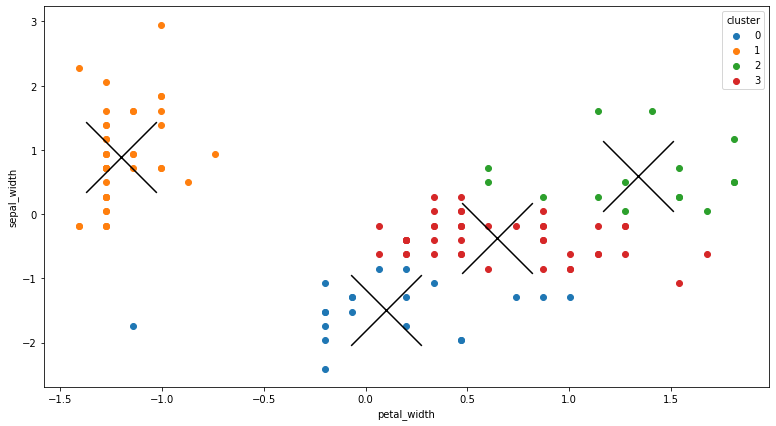

In [26]:
# putting it all together in a graph when the dataframe is being grouped by kmeans
# sepal width and petal width

fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train_scaled.groupby('cluster'):
    ax.scatter(subset.petal_width, subset.sepal_width, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal width', xlabel='petal width')

train_scaled.groupby('cluster').mean().plot.scatter(y='sepal_width', x='petal_width', marker='x', s=5000, ax=ax, c='black')

In [27]:
# sum of squared distances from each point to its cluster center
kmeans.inertia_

47.230863631094756

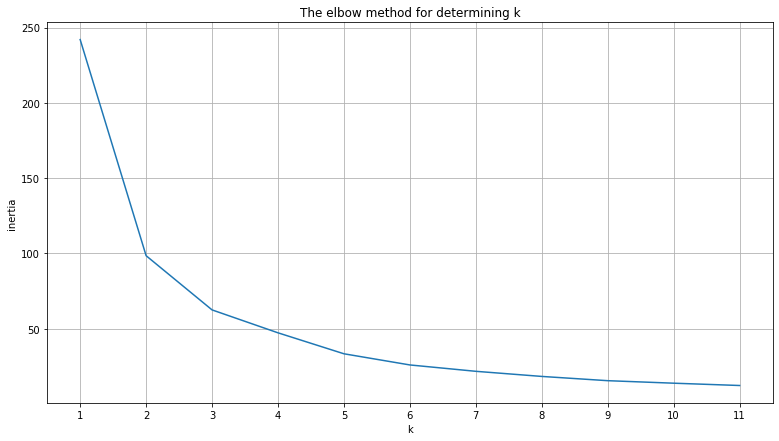

In [28]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

Looking at the above elbow method, a k=4 approach seems to be best.

# Going for 3 different features

In [29]:
# splitting the data
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scaling the data
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [30]:
#Getting the scaled features

X = train_scaled[['petal_width','sepal_width','sepal_length']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
#checking out the centroids

pd.DataFrame(kmeans.cluster_centers_,columns=X.columns)

,petal_width,sepal_width,sepal_length
0,-0.031869,-1.622783,-0.531185
1,-1.201998,0.887051,-0.939411
2,0.539988,-0.500205,0.277323
3,1.125798,0.181892,1.337121


In [32]:
# looking at the shape
X.shape

(121, 3)

In [33]:
kmeans.labels_.shape

(121,)

In [34]:
train['cluster'] = kmeans.labels_
train

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sepal_length,sepal_width,petal_length,petal_width,species,cluster
41,4.5,2.3,1.3,0.3,setosa,0
142,5.8,2.7,5.1,1.9,virginica,2
82,5.8,2.7,3.9,1.2,versicolor,2
127,6.1,3.0,4.9,1.8,virginica,2
28,5.2,3.4,1.4,0.2,setosa,1
...,...,...,...,...,...,...
29,4.7,3.2,1.6,0.2,setosa,1
52,6.9,3.1,4.9,1.5,versicolor,3
1,4.9,3.0,1.4,0.2,setosa,1
57,4.9,2.4,3.3,1.0,versicolor,0


In [35]:
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,5.393333,2.353333,3.686667,1.126667
1,5.054762,3.476190,1.473810,0.254762
2,6.063889,2.855556,4.700000,1.552778
3,6.942857,3.160714,5.667857,1.989286


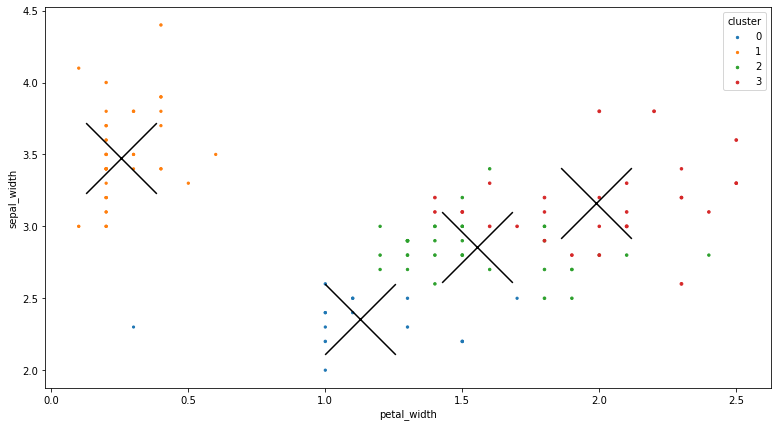

In [36]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_width, subset.sepal_width, subset.sepal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal width', xlabel='petal width')

train.groupby('cluster').mean().plot.scatter(y='sepal_width', x='petal_width', marker='x', s=5000, ax=ax, c='black')

In [37]:
#checking out the elbow method if we chose the correct k
kmeans.inertia_

79.70826378455652

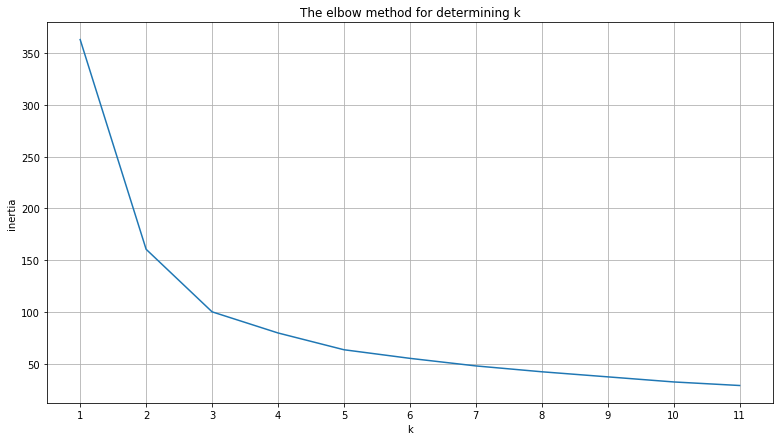

In [38]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

k=4 still seems the way to go.

# 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [39]:
# Bringing in the mall data

df = acquire.get_mall_data()
df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [40]:
# data split
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = StandardScaler()
cols = ['age', 'spending_score', 'annual_income']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [41]:
X = train_scaled[['spending_score', 'annual_income']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,spending_score,annual_income
0,1.252264,0.959149
1,0.023179,-0.219025
2,-1.243490,1.039423
3,-1.148820,-1.249062
4,1.102844,-1.358568


In [43]:
X.shape

(162, 2)

In [44]:
kmeans.labels_.shape

(162,)

In [45]:
train['cluster'] = kmeans.labels_
train

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,gender,age,annual_income,spending_score,cluster
12,13,Female,58,20,15,3
64,65,Male,63,48,51,1
175,176,Female,30,88,86,0
87,88,Female,22,57,55,1
111,112,Female,19,63,54,1
...,...,...,...,...,...,...
139,140,Female,35,74,72,0
167,168,Female,33,86,95,0
0,1,Male,19,15,39,3
70,71,Male,70,49,55,1


In [46]:
train_scaled['cluster'] = kmeans.labels_
train_scaled

,customer_id,gender,age,annual_income,spending_score,cluster
12,13,Female,1.378516,-1.507050,-1.346646,3
64,65,Male,1.736629,-0.467674,0.063596,1
175,176,Female,-0.626920,1.017150,1.434665,0
87,88,Female,-1.199901,-0.133588,0.220290,1
111,112,Female,-1.414769,0.089135,0.181117,1
...,...,...,...,...,...,...
139,140,Female,-0.268806,0.497462,0.886238,0
167,168,Female,-0.412051,0.942909,1.787226,0
0,1,Male,-1.414769,-1.692653,-0.406485,3
70,71,Male,2.237988,-0.430553,0.220290,1


In [47]:
train_scaled.groupby('cluster').mean()

,customer_id,age,annual_income,spending_score
cluster,,,,
0,161.187500,-0.445625,0.959149,1.252264
1,84.650794,0.243921,-0.219025,0.023179
2,163.600000,0.148993,1.039423,-1.243490
3,24.000000,0.547692,-1.249062,-1.148820
4,20.117647,-0.972394,-1.358568,1.102844


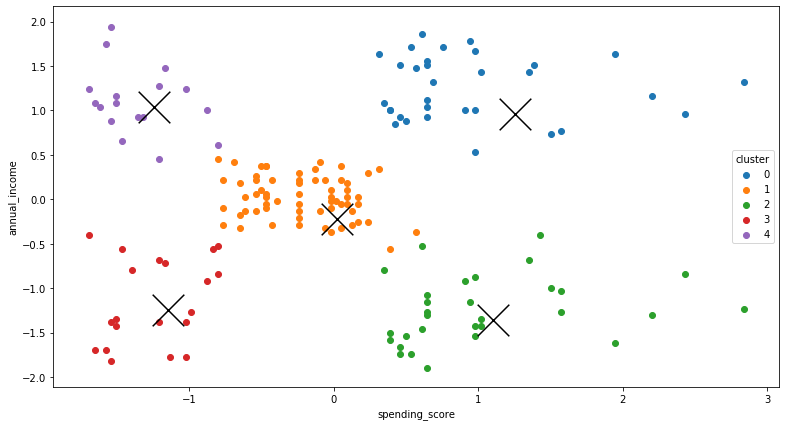

In [48]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train_scaled.groupby('cluster'):
    ax.scatter(subset.annual_income, subset.spending_score, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='annual income', xlabel='spending score')

train_scaled.groupby('cluster').mean().plot.scatter(y='annual_income', x='spending_score', marker='x', s=1000, ax=ax, c='black')

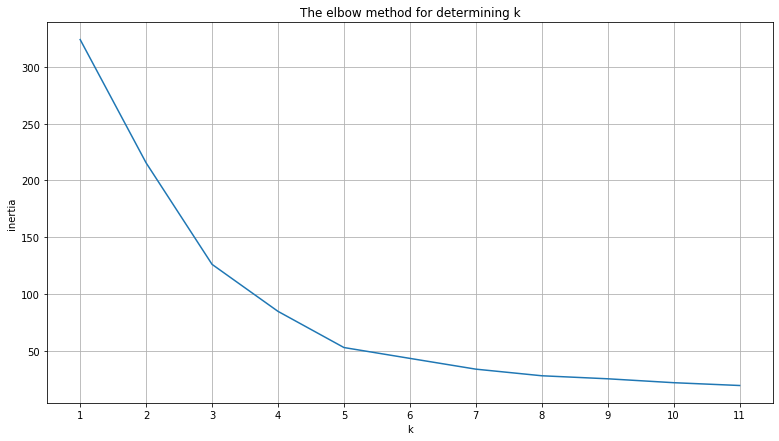

In [49]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

# 3. How does scaling impact the results of clustering?

In [50]:
# data split
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

X = train[['spending_score', 'annual_income']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,spending_score,annual_income
0,49.968254,54.698413
1,77.529412,24.000000
2,17.633333,88.600000
3,20.050000,26.950000
4,81.343750,86.437500


In [52]:
X.shape

(162, 2)

In [53]:
train['cluster'] = kmeans.labels_
train

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,gender,age,annual_income,spending_score,cluster
12,13,Female,58,20,15,3
64,65,Male,63,48,51,0
175,176,Female,30,88,86,4
87,88,Female,22,57,55,0
111,112,Female,19,63,54,0
...,...,...,...,...,...,...
139,140,Female,35,74,72,4
167,168,Female,33,86,95,4
0,1,Male,19,15,39,3
70,71,Male,70,49,55,0


In [54]:
train.groupby('cluster').mean()

,customer_id,age,annual_income,spending_score
cluster,,,,
0,84.650794,42.158730,54.698413,49.968254
1,20.117647,25.176471,24.000000,77.529412
2,163.600000,40.833333,88.600000,17.633333
3,24.000000,46.400000,26.950000,20.050000
4,161.187500,32.531250,86.437500,81.343750


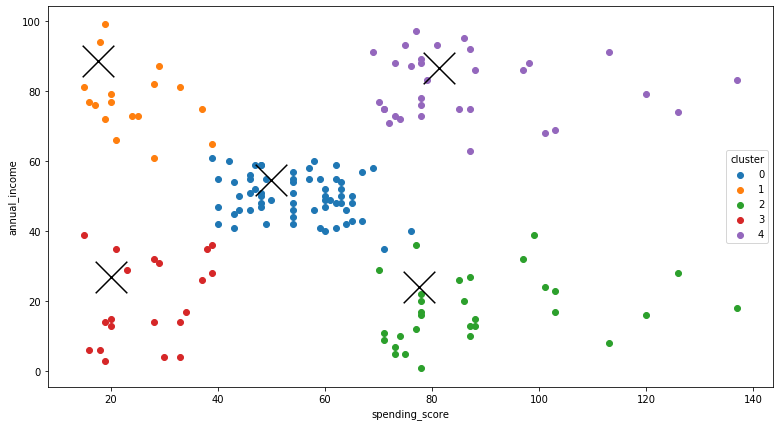

In [55]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.annual_income, subset.spending_score, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='annual income', xlabel='spending score')

train.groupby('cluster').mean().plot.scatter(y='annual_income', x='spending_score', marker='x', s=1000, ax=ax, c='black')

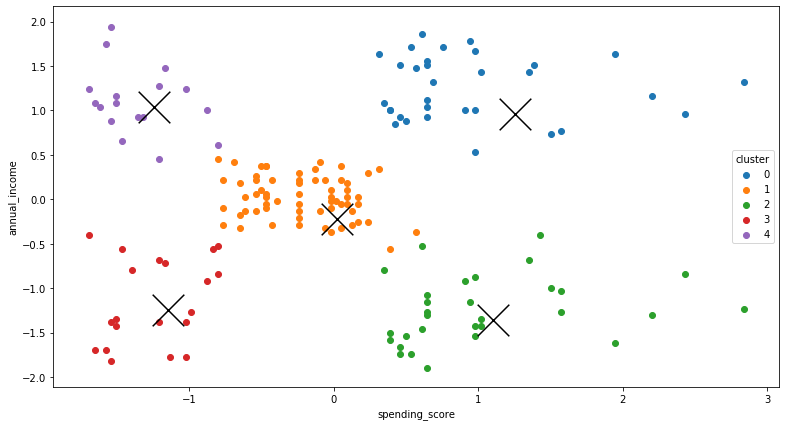

In [56]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train_scaled.groupby('cluster'):
    ax.scatter(subset.annual_income, subset.spending_score, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='annual income', xlabel='spending score')

train_scaled.groupby('cluster').mean().plot.scatter(y='annual_income', x='spending_score', marker='x', s=1000, ax=ax, c='black')

Centroids are placed differently on the unscaled data

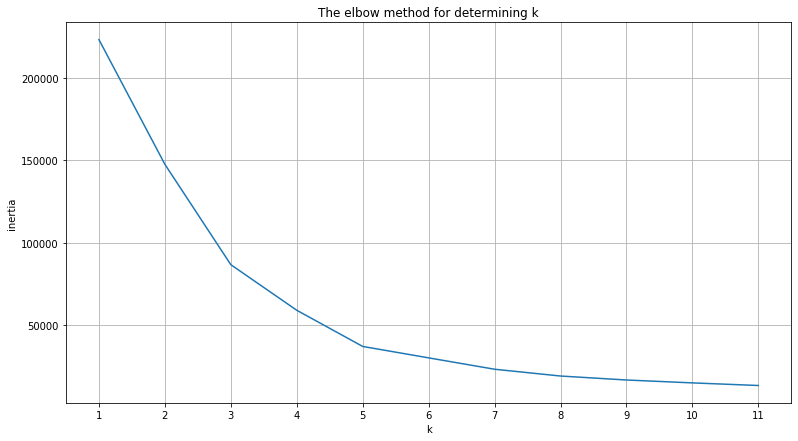

In [57]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()